In [16]:
from data import *
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklego.meta import ZeroInflatedRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [17]:
df = read_data() # 'tx_crash.csv' the new feature does not seem useful, acc=0.815
#df = read_data(is_small=False)

df_X = df.drop(columns=['tot_crash_count', 'crash'])
df_y = df['tot_crash_count']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

zir = ZeroInflatedRegressor(
    classifier=RandomForestClassifier(),
    regressor=RandomForestRegressor()
)

In [18]:
zir.fit(X_train, y_train)
# y_val_pred = zir.predict(X_val)
# plt.plot(y_val, y_val_pred, '.')
# plt.show()

# y_test_pred = zir.predict(X_test)
# plt.scatter(y_test, y_test_pred)
# plt.show()

zir.score(X_train, y_train)
# zir.score(X_test, y_test)

0.9316464534132328

In [19]:
zir.score(X_val, y_val)

0.3627748748137767

In [27]:
y_val_pred = zir.predict(X_val)

In [28]:
y_val_pred

array([0.  , 5.01, 0.  , ..., 0.  , 0.  , 0.  ])

In [29]:
y_val

517610     0
93678      2
336086     0
213547     0
274447    35
          ..
348306     0
59021      0
351096     0
323335     3
217797     0
Name: tot_crash_count, Length: 6365, dtype: int64

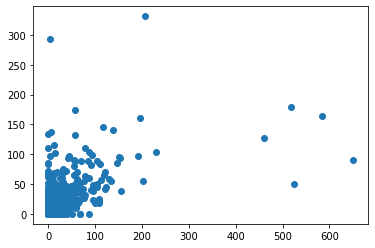

In [24]:
plt.scatter(y_val, y_val_pred)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [30]:
print(mean_squared_error(y_train, zir.predict(X_train)))
print(r2_score(y_train, zir.predict(X_train)))

17.97290583470093
0.9316464534132328


In [31]:
print(mean_squared_error(y_val, y_val_pred))
print(r2_score(y_val, y_val_pred))

244.21477459544383
0.3627748748137767
